In [2]:
!pip install lightkurve

     |████████████████████████████████| 245 kB 14.0 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 41 kB 168 kB/s 
     |████████████████████████████████| 4.4 MB 47.6 MB/s 
     |████████████████████████████████| 98 kB 5.9 MB/s 
     |████████████████████████████████| 802 kB 61.7 MB/s 
     |████████████████████████████████| 54 kB 1.9 MB/s 
     |████████████████████████████████| 3.2 MB 53.9 MB/s 
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11376 sha256=e7b097fe966280fec685408a6a45e47e94ed43c98c3cd3706969d441303f132a
  Stored in directory: /root/.cache/pip/wheels/93/08/0c/1b9866c35c8d3f136d100dfe88036a32e0795437daca089f70
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50466 sha256=18373ea203c9fbdc26fcf2f18b255791b333960ebddab51ccf19c71c97b8d31f
  Stored in directory: /root/.cache/pip/wheels/38/f7/65/161985e7311dd484a23b3a5c9149995dbf11db6cede602e7ef
  Created wheel for ok

In [3]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile("WASP-101", sector=33).download();

/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


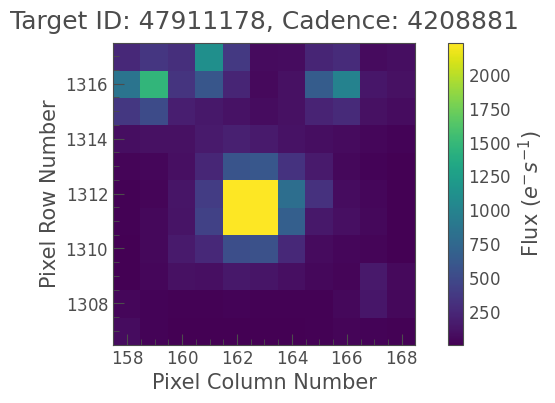

In [4]:
pixelfile.plot(frame=1);

In [5]:
lc = pixelfile.to_lightcurve(aperture_mask='all');

In [6]:
lc.time

<Time object: scale='tdb' format='btjd' value=[2201.73608581 2201.7363173  2201.73654879 ... 2227.57662924 2227.57686072
 2227.57709219]>

In [7]:
lc.flux

<Quantity [33883.977, 34121.81 , 34092.4  , ..., 34030.832, 34040.812,
           34044.6  ] electron / s>

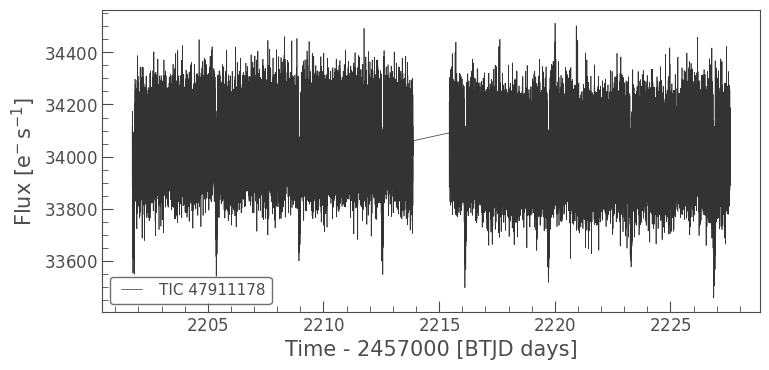

In [8]:
lc.plot();

In [9]:
import lightkurve as lk

/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


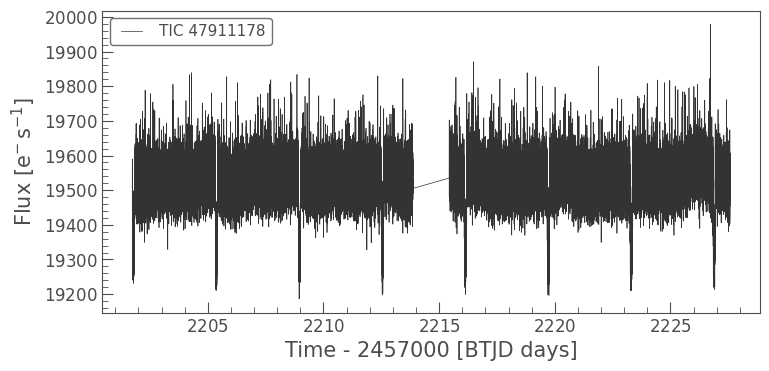

In [12]:
lk = lk.search_lightcurve('WASP-101', sector=33).download()
lk.plot()

In [14]:
pg = lk.normalize(unit='ppm').to_periodogram()
pg

<bound method Periodogram.plot of LombScarglePeriodogram(ID: TIC 47911178)>

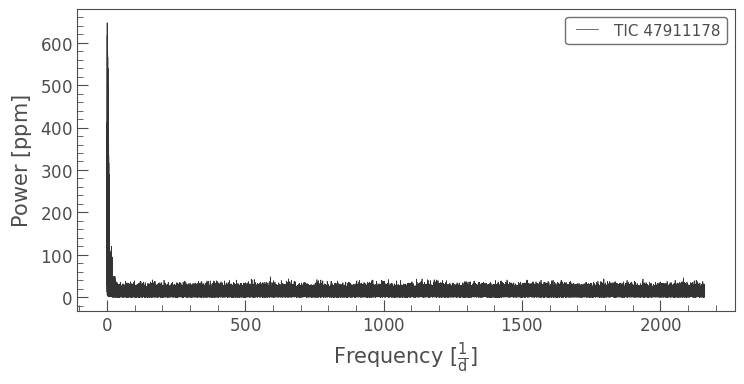

In [15]:
pg.plot()

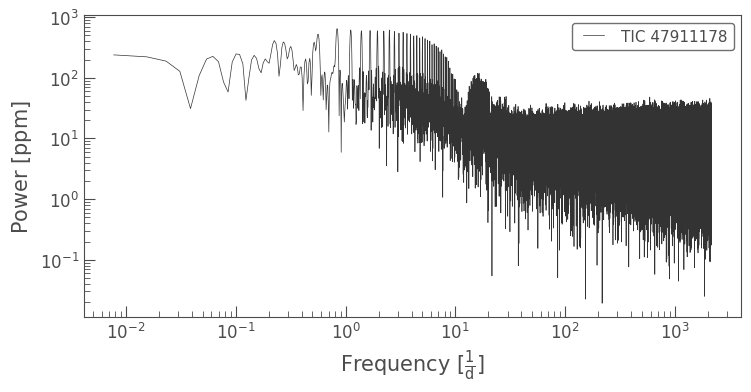

In [16]:
pg.plot(scale='log');

In [19]:
period = pg.period_at_max_power
period

<Quantity 1.19634289 d>

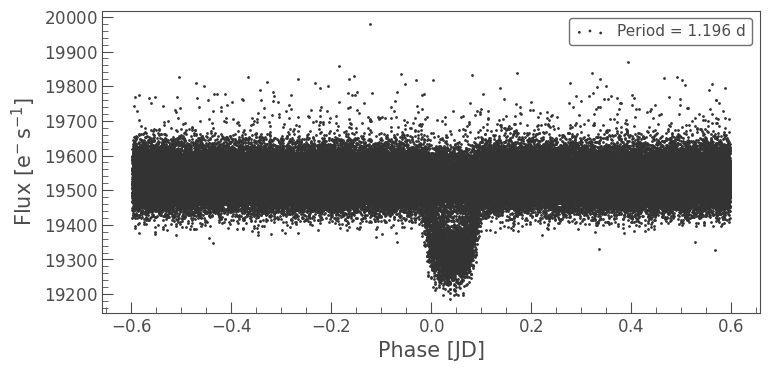

In [20]:
lk.fold(period).scatter(label=f'Period = {period.value:.3f} d');

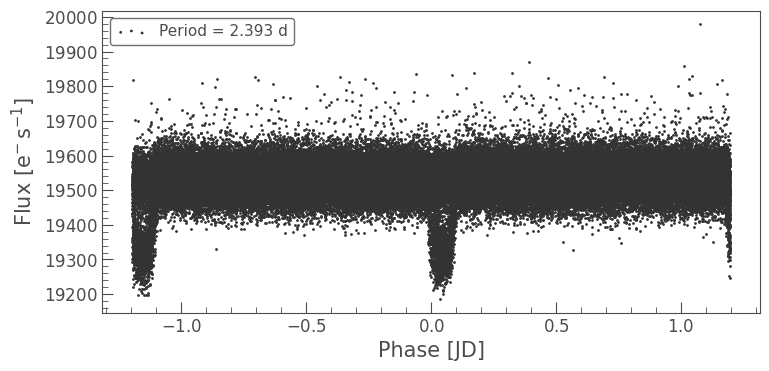

In [21]:
lk.fold(2*period).scatter(label=f'Period = {2*period.value:.3f} d');

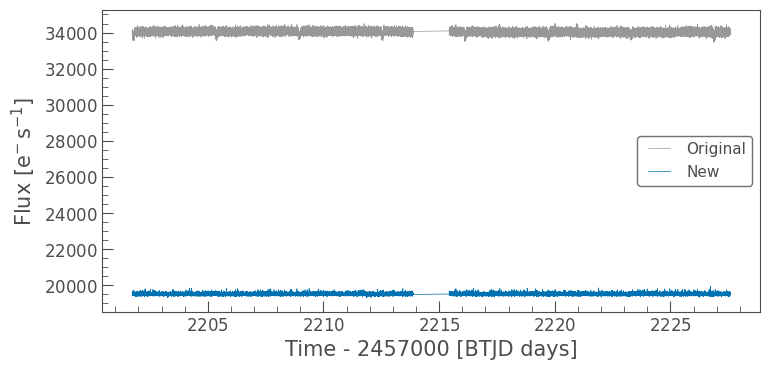

In [22]:
newlc = lk.copy()
for i in range(50):
  pg = newlc.to_periodogram()
  model = pg.model(time=newlc.time, frequency=pg.frequency_at_max_power)
  newlc.flux = newlc.flux / model.flux

# Plot the new light curve on top of the original one
ax = lc.plot(alpha=.5, label='Original');
newlc.plot(ax=ax, label='New');

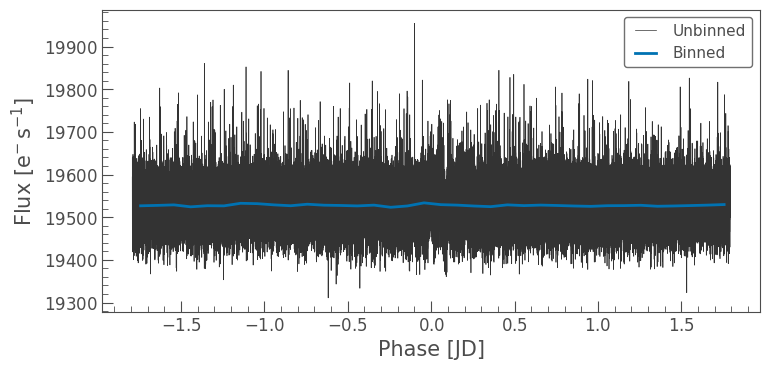

In [24]:
planet_period = 3.58572
ax = newlc.fold(period=planet_period).plot(label='Unbinned')
newlc.fold(period=planet_period).bin(0.1).plot(ax=ax, lw=2, label='Binned');

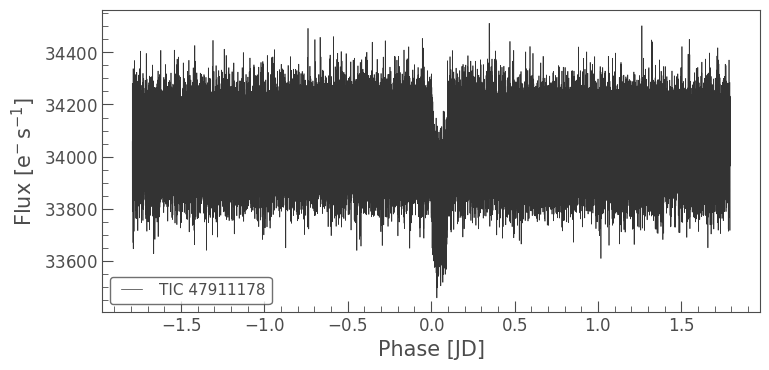

In [25]:
lc.fold(period=planet_period).plot();